In [25]:
# SVM visualization

In [26]:
# Import and load
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

# Estimator 
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Optimization
from sklearn.grid_search import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

%matplotlib inline
%run plot_learning_curve

In [27]:
# Get content from web
url="https://raw.githubusercontent.com/gsi-upm/sitc/master/ml2/data-titanic/train.csv"
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.7 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [28]:
# Fill missing values and categorize
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Sex'].fillna('male', inplace=True)
df['Embarked'].fillna('S', inplace = True)

# Encode after filling
df['Age']=df['Age'].fillna(df['Age'].median())
df.loc[df['Sex']=='male', 'Sex']=0
df.loc[df['Sex']=='female', 'Sex']=1
df.loc[df['Embarked']=='S', 'Embarked']=0
df.loc[df['Embarked']=='C', 'Embarked']=1
df.loc[df['Embarked']=='Q', 'Embarked']=2

# Drop unused columns
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [29]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0


In [34]:
# Here comes the splitting
# Features
features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
# Transform dataframe in numpy arrays
X=df[features].values
y=df['Survived'].values
# Splitting
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=33)

In [36]:
# Define model
types_of_kernels=['linear', 'rbf', 'poly']
kernel=types_of_kernels[0]
gamma=3.0

#kNN model
model = SVC(kernel=kernel, probability=True, gamma=gamma)

In [37]:
# Train and evaluate
model.fit(X_train, y_train)

predicted = model.predict(X_test)
expected=y_test

In [38]:
# Accuracy 
metrics.accuracy_score(expected,predicted)

0.8116591928251121

In [39]:
# Null accuracy
s_y_test=Series(y_test)
s_y_test.value_counts()

0    134
1     89
dtype: int64

In [40]:
y_test.mean()

0.3991031390134529

In [41]:
# Confussion matrix
metrics.confusion_matrix(expected,predicted)

array([[115,  19],
       [ 23,  66]])

In [42]:
print(classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.83      0.86      0.85       134
          1       0.78      0.74      0.76        89

avg / total       0.81      0.81      0.81       223



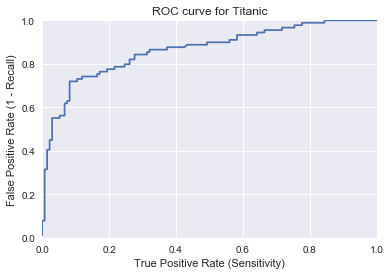

In [44]:
# ROC curve: Performance of a binary classifier as 
# its discrimination threshold changes
y_pred_prob=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Titanic')
plt.ylabel('False Positive Rate (1 - Recall)')
plt.xlabel('True Positive Rate (Sensitivity)')
plt.grid(True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a0a3ad6d8>,
      dtype=object)

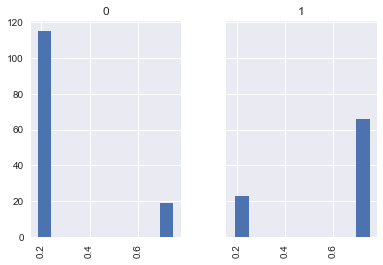

In [49]:
# Histogram of probability vs actual
dprob=pd.DataFrame(data = {'probability':y_pred_prob,'actual':y_test})
dprob.probability.hist(by=dprob.actual, sharex=True, sharey=True)

In [50]:
# Let's find the threshold
def evaluate_threshold (threshold):
    print('Sensitivity:', tpr[thresholds>threshold][-1])
    print('Recall:', 1-fpr[thresholds>threshold][-1])

In [56]:
print(roc_auc_score(expected,predicted))

0.799890994465873


In [63]:
# Evaluation using K-Fold
cv=KFold(X.shape[0], n_folds=5, shuffle=False, random_state=33)
scores=cross_val_score(model, X, y, cv=cv)
print('Scores in every iteration:', scores)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std()*2))

Scores in every iteration: [0.81564246 0.80337079 0.78089888 0.73595506 0.80337079]
Accuracy: 0.79 (+/- 0.06)


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

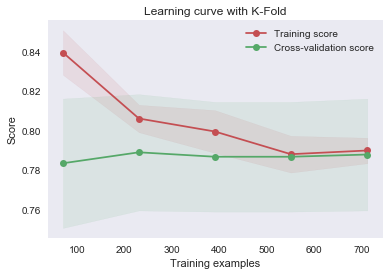

In [64]:
plot_learning_curve(model, 'Learning curve with K-Fold', X, y, cv=cv)

In [67]:
# For optimization
gammas=np.logspace(-6, -1, 10)
gs=GridSearchCV(model, param_grid=dict(gamma=gammas))
gs.fit(X_train, y_test)
scores=gs.scores(X_test, y_test)
print(scores)

ValueError: Found input variables with inconsistent numbers of samples: [668, 223]